In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("loanstatus.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The data sets have mixture of Float, int and object type data set 

In [4]:
df.shape

(614, 13)

The data set consist of 614 row and 13 columns 

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender, Depandents, Self_employed, Loan amount, Loan_Amount_Term, Credit_History have null value

For object we are going to use mode to replace NAN
For Float and Integer we are going to use mean or median to replace NAN

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
column=[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

for i in df[column]:
        print(str(i))
        print(df[i].value_counts())
        print("\n")

Gender
Male      489
Female    112
Name: Gender, dtype: int64


Married
Yes    398
No     213
Name: Married, dtype: int64


Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64


Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64


Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64




Converting String into Int

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)


In [9]:
df['Married'].fillna(df['Married'].mode()[0], inplace = True)


In [10]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

In [11]:

df['LoanAmount'].replace(np.NaN,df['LoanAmount'].mean(), inplace = True)

In [12]:
df['Loan_Amount_Term'].replace(np.NaN,df['Loan_Amount_Term'].mean(), inplace = True)

In [13]:
df['Credit_History'].replace(np.NaN,df['Credit_History'].mean(), inplace = True)

In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [15]:
df["Dependents"]=df["Dependents"].replace("3+","4")

In [16]:
df['Dependents'].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [17]:
df['Dependents'].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [18]:
df.loc[df["Dependents"]==" "]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [19]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

In [20]:
df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [22]:
df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [23]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [25]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Converting Ordinal value into Numerical dataset

Visualazation

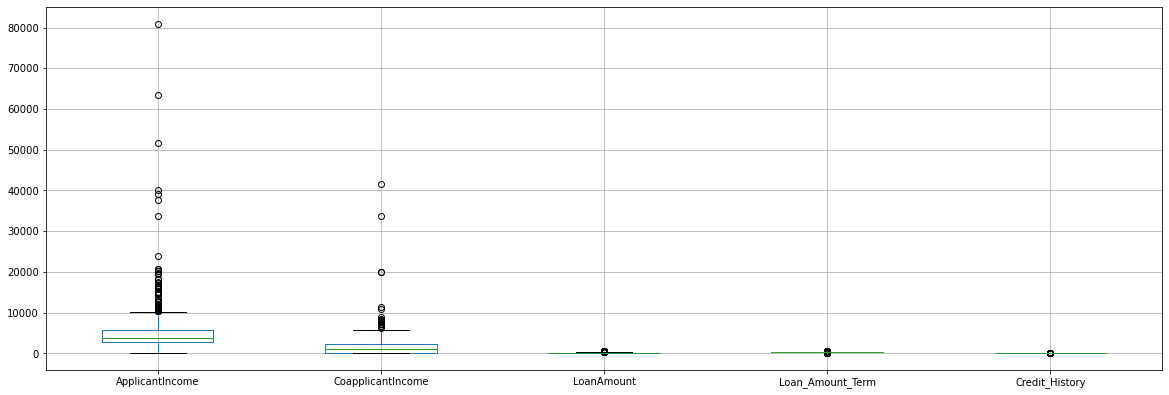

In [28]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

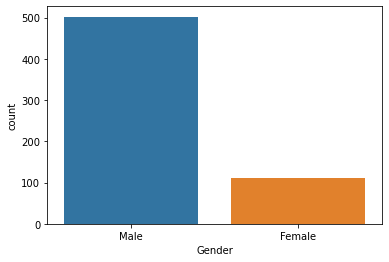

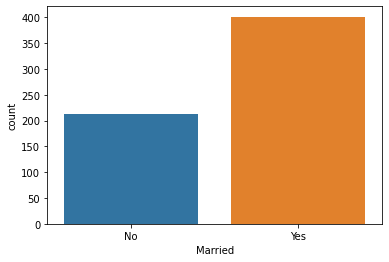

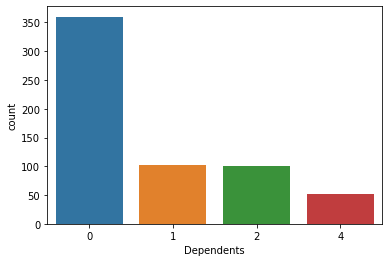

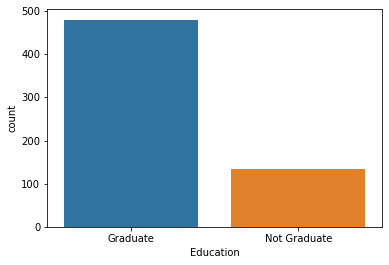

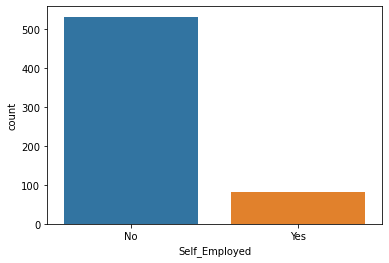

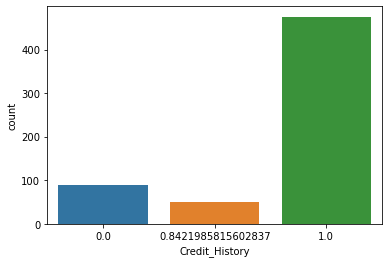

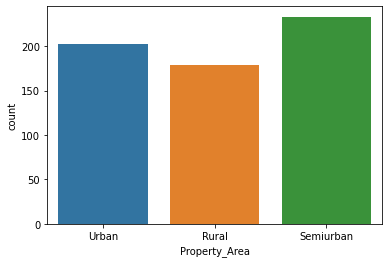

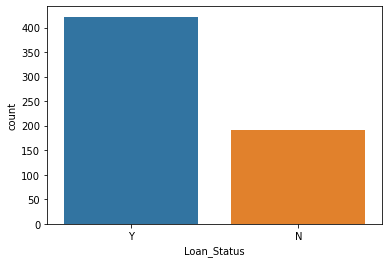

In [31]:
columns=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']

for  i in df[columns]:
    plt.figure()
    sb.countplot(df[i])

Since the target is class im balance and need to be treated by sampling method

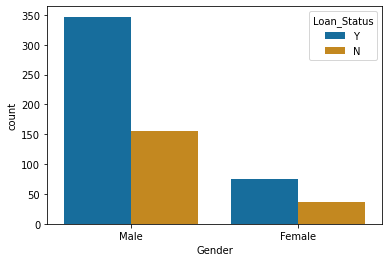

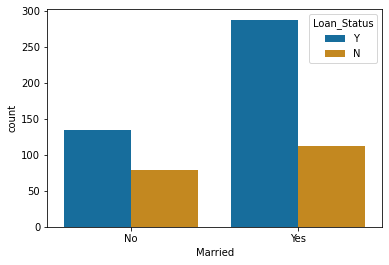

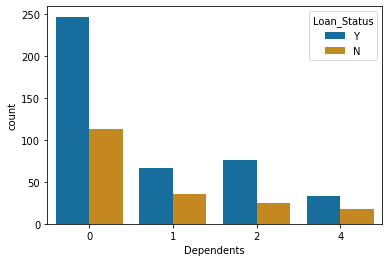

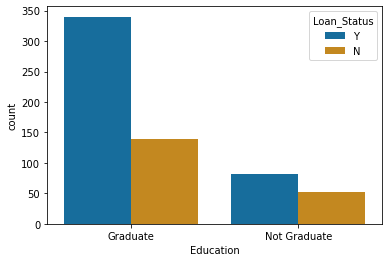

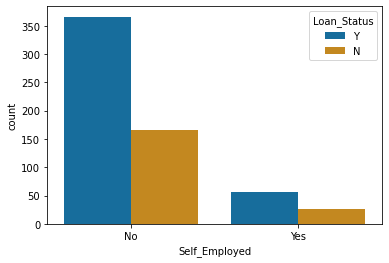

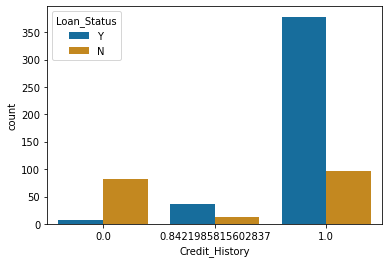

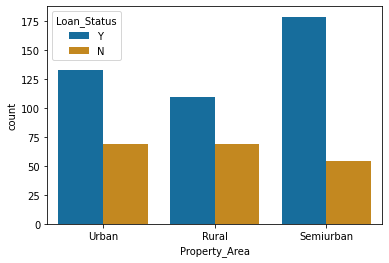

In [35]:
columns=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Credit_History', 'Property_Area']

for  i in df[columns]:
    plt.figure()
    sb.countplot(x=df[i],hue="Loan_Status",data=df, palette= "colorblind")


The aboove plot helps to know who can get the loan 

In [36]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [43]:
from sklearn.preprocessing import OrdinalEncoder
oec=OrdinalEncoder()

In [44]:
columns=['Gender','Married',"Dependents",'Education',"Self_Employed","Property_Area"] 
for i in df[columns]:
    if df[i].dtypes=="object":
        df[i]=oec.fit_transform(df[i].values.reshape(-1,1))
        
        

In [45]:
df=df.drop("Loan_ID",axis=1)

Since the loan ID which willnot use to predict the model 

In [46]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [47]:
df["Loan_Status"]=le.fit_transform(df["Loan_Status"].values.reshape(-1,1))

In [48]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


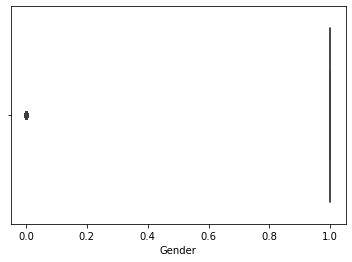

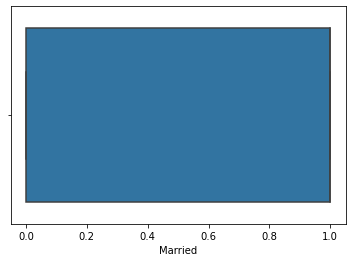

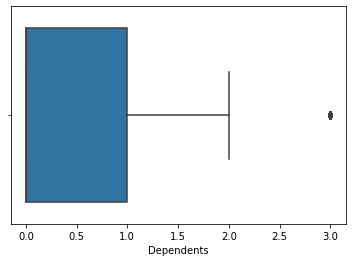

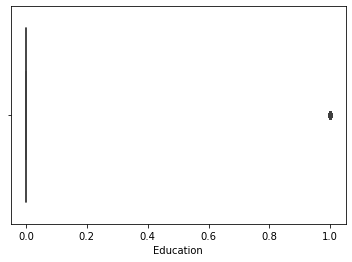

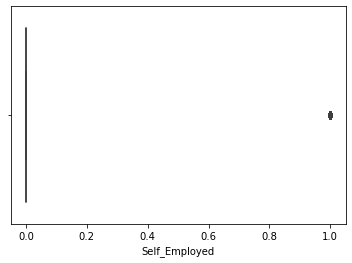

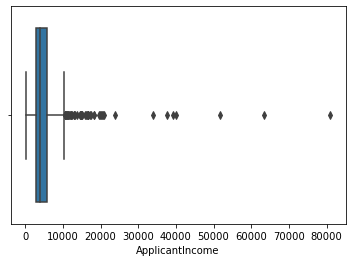

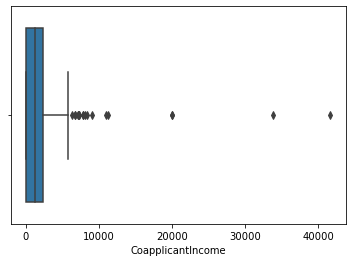

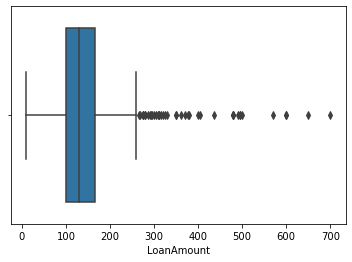

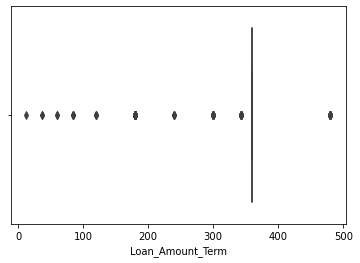

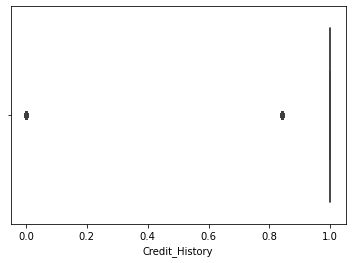

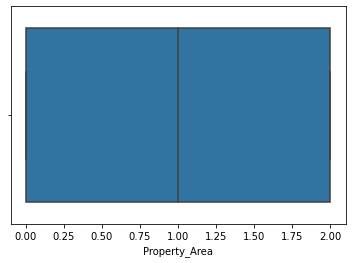

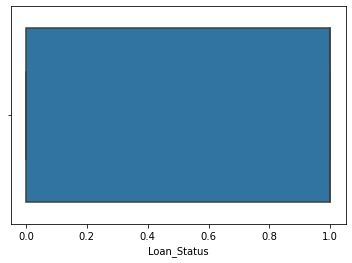

In [49]:
columns=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

for  i in df[columns]:
    plt.figure()
    sb.boxplot(df[i])

The Outliers in Ordinal data not to be removedeven the loan term is Numerical but it has been terms which is provided to the customer according to their capability so that none of the outiers need to to removed

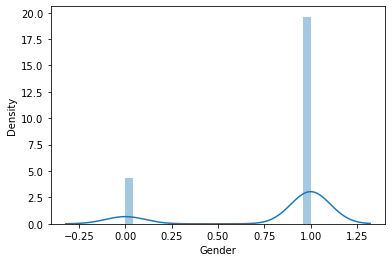

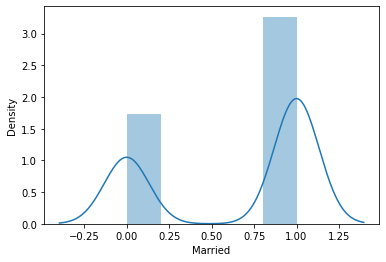

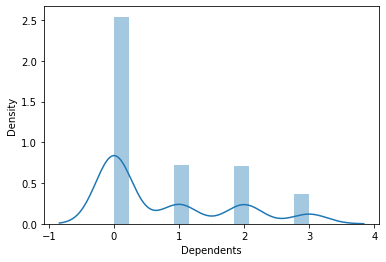

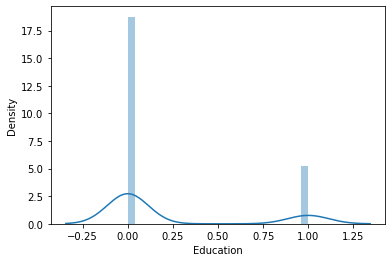

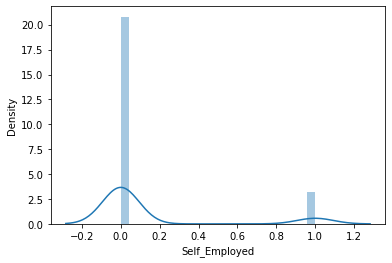

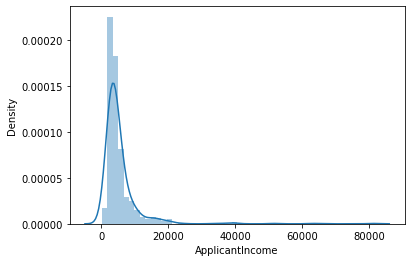

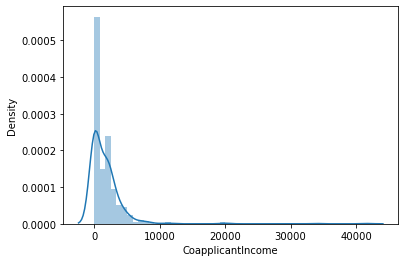

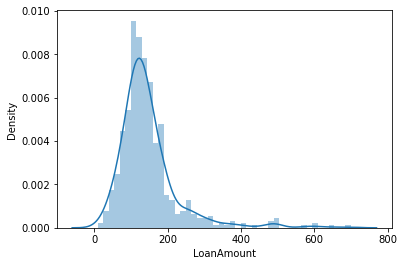

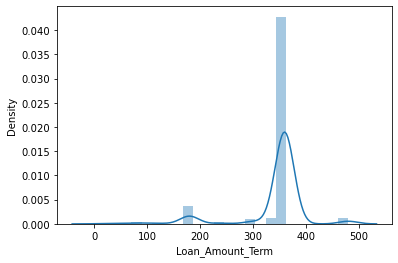

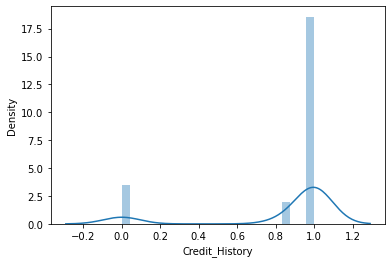

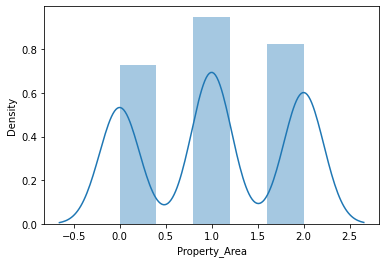

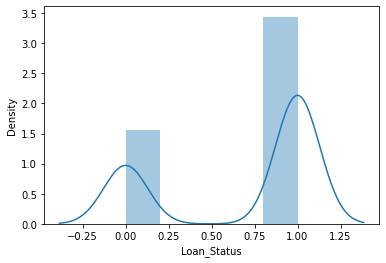

In [50]:
columns=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

for  i in df[columns]:
    plt.figure()
    sb.distplot(df[i])

In [51]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

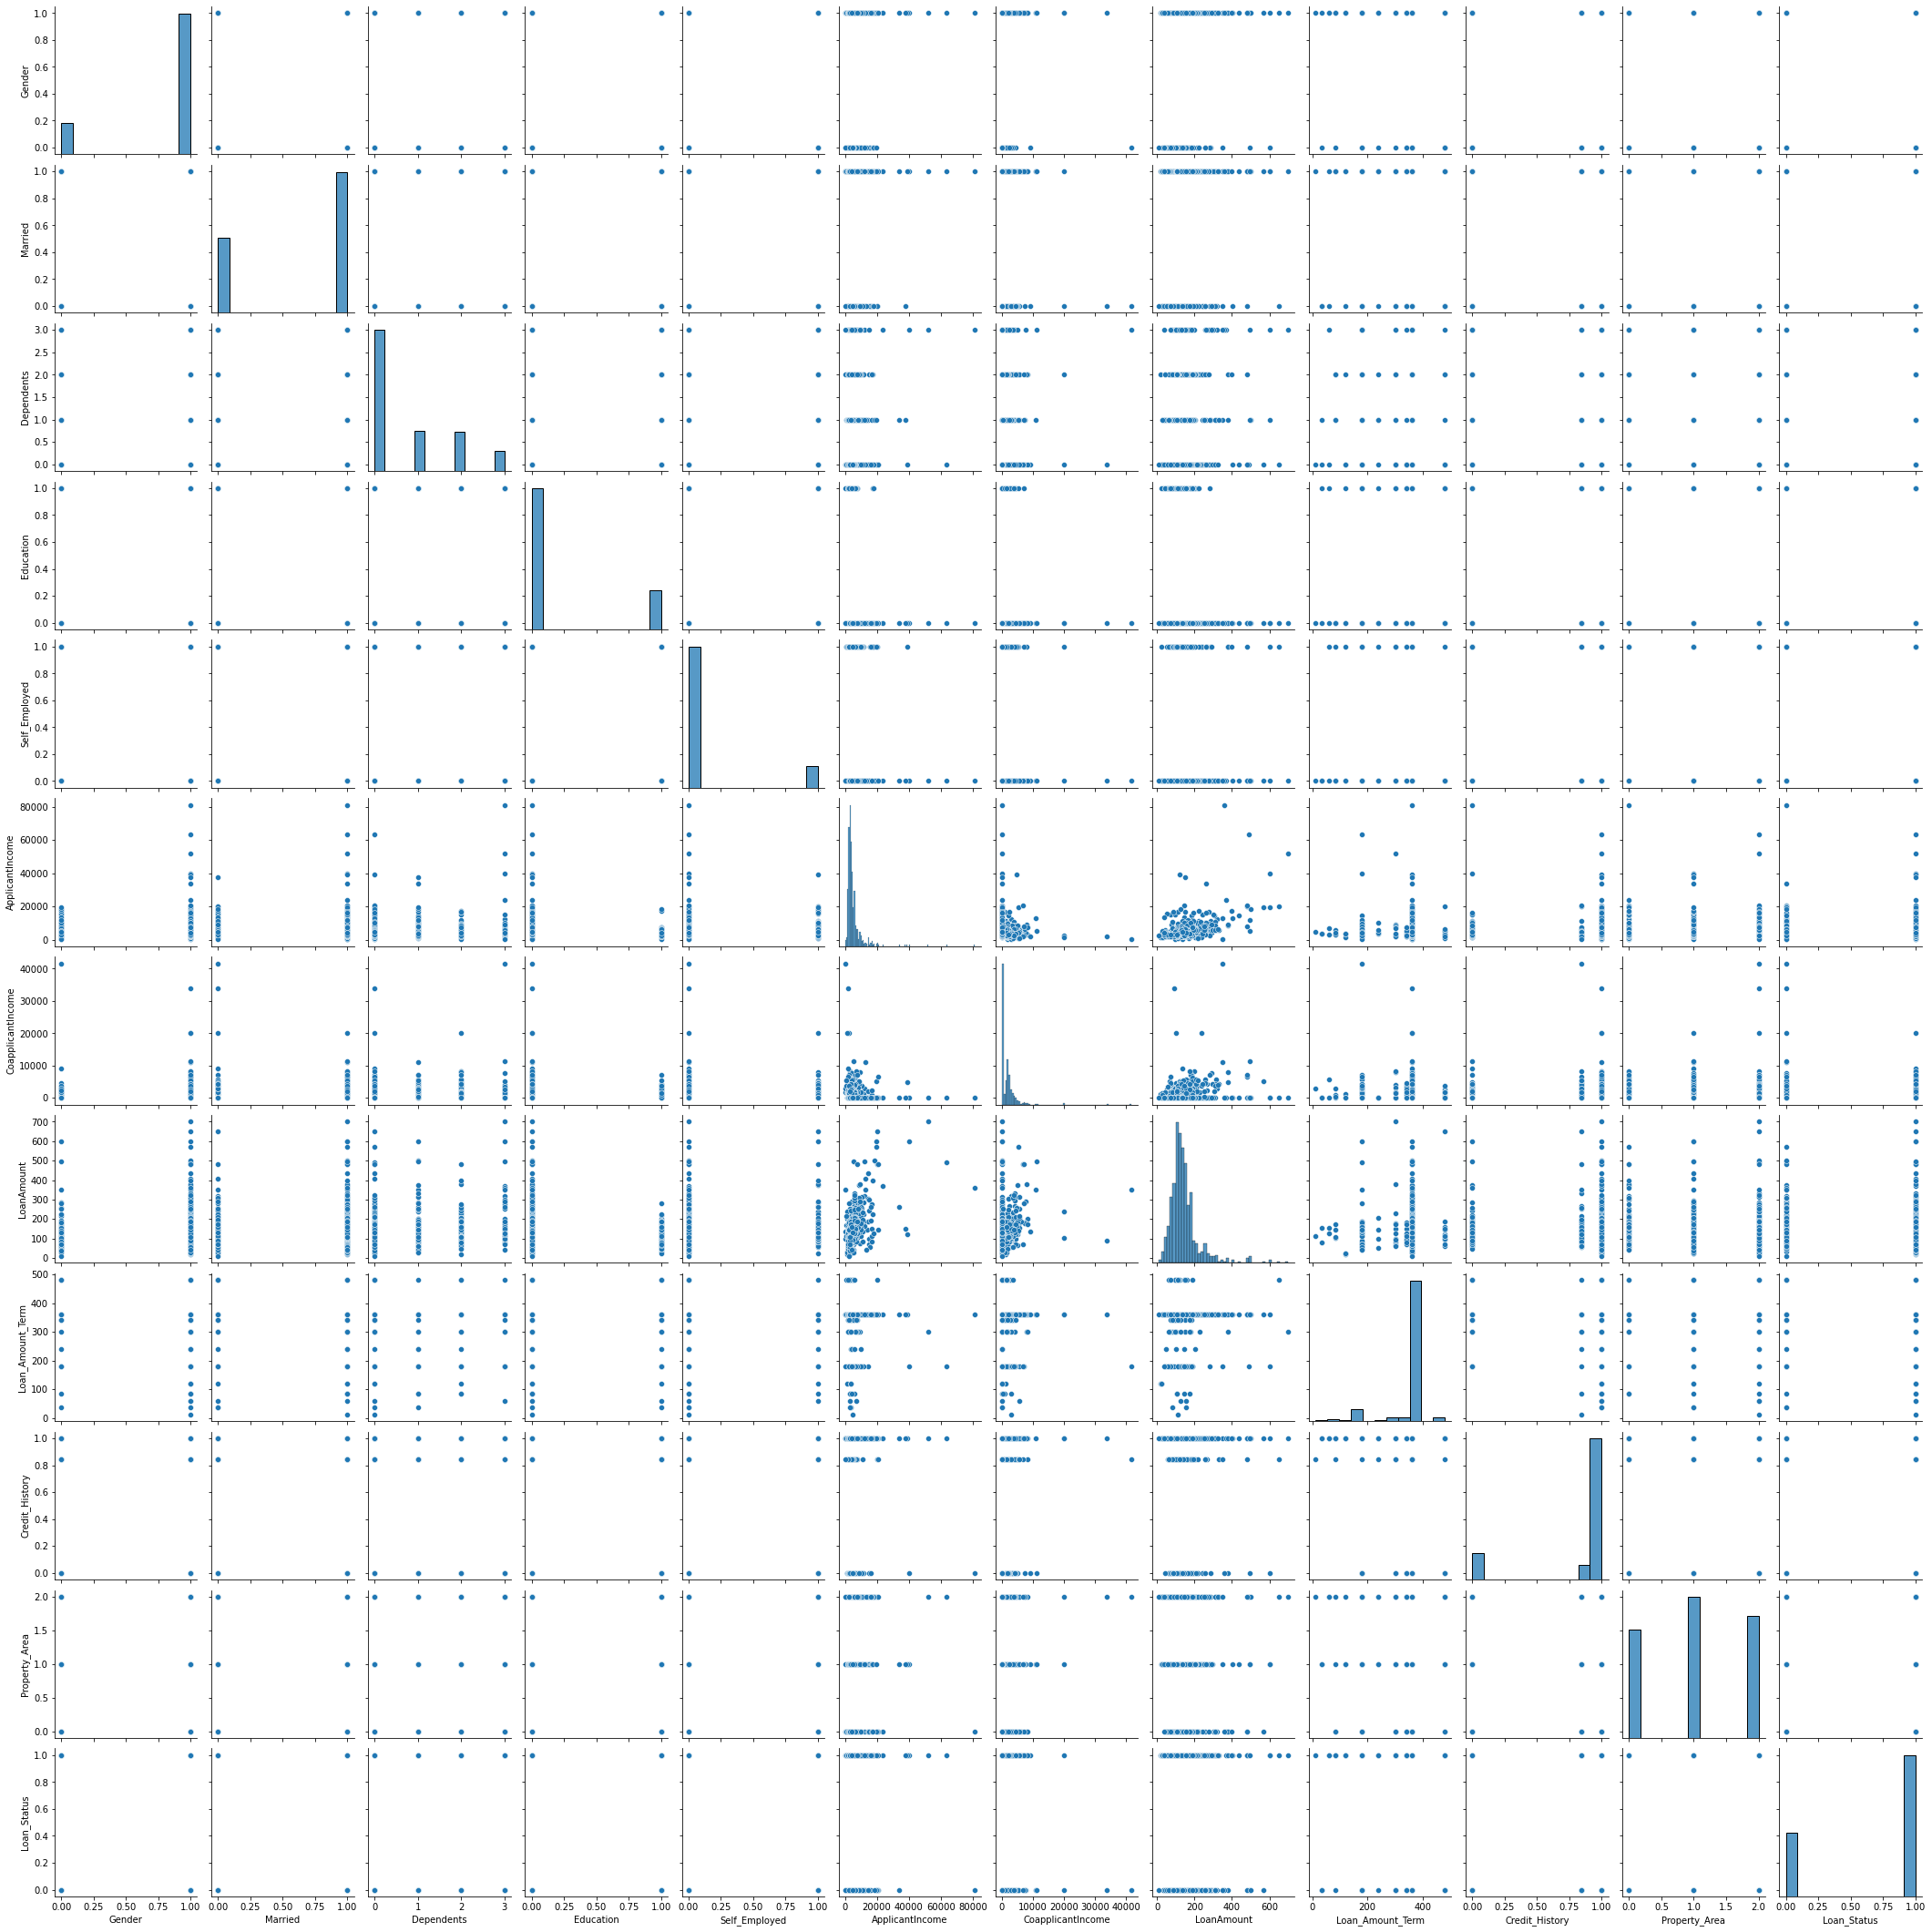

In [56]:
sb.pairplot(df)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

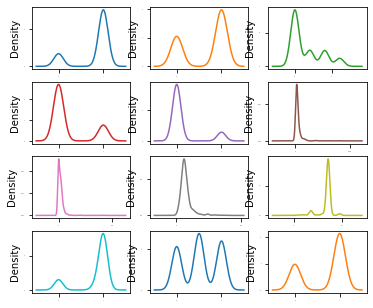

In [61]:
df.plot(kind="density",subplots=True,layout=(6,3),sharex=False,legend=False,fontsize=1,figsize=(6,8))

Skewnees need not to be treated in the given data set the skewed data some or ordinal and if we cant treat skewness in income were every customer has different income 

In [52]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

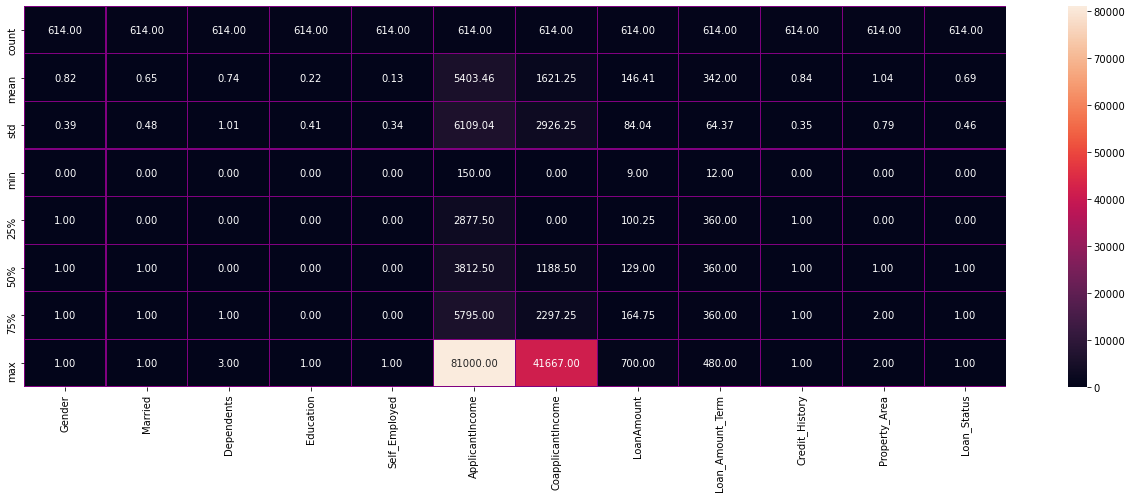

In [53]:
plt.figure(figsize=(22,7))
sb.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="purple",fmt="0.2f")

In [54]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


<AxesSubplot:>

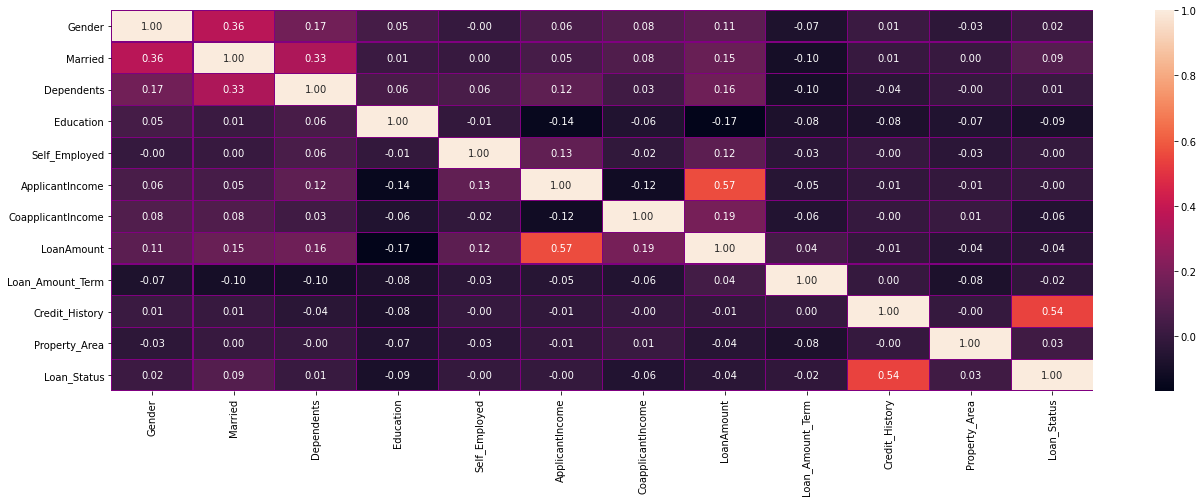

In [55]:
plt.figure(figsize=(22,7))
sb.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="purple",fmt="0.2f")

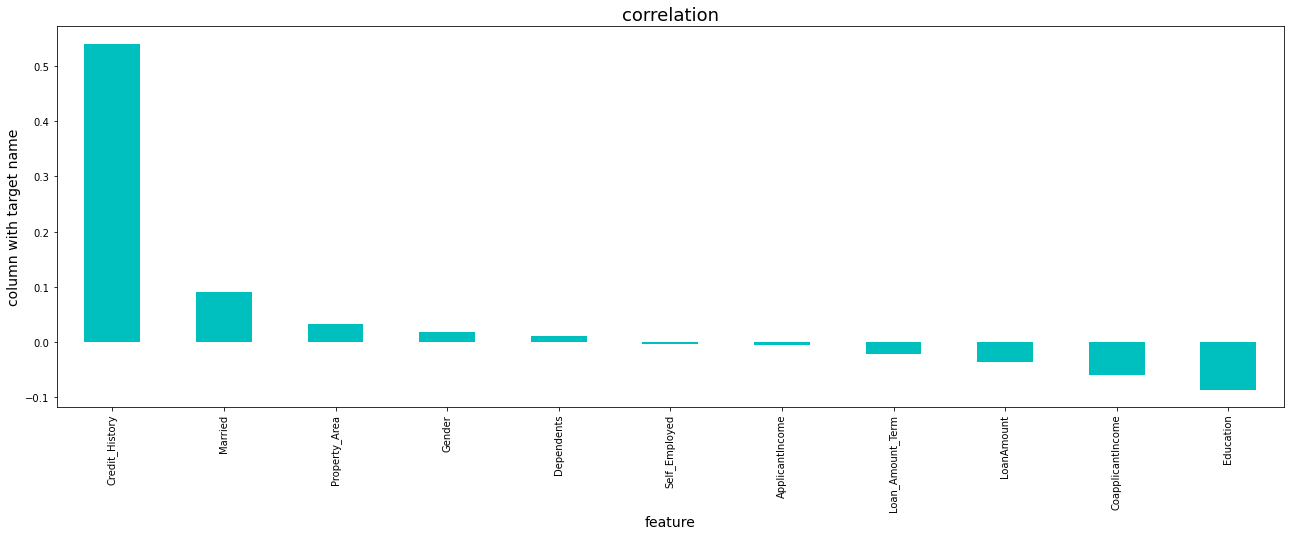

In [63]:
plt.figure(figsize=(22,7))
df.corr()["Loan_Status"].sort_values(ascending=False).drop(["Loan_Status"]).plot(kind="bar",color="c")
plt.xlabel("feature",fontsize=14)
plt.ylabel("column with target name",fontsize=14)
plt.title("correlation",fontsize=18)
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,precision_score,recall_score,classification_report,roc_curve 
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")




In [65]:
lr= LogisticRegression()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
gnb=GaussianNB()

In [67]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [93]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [94]:
sm=SMOTE()

In [95]:
x_over,y_over = sm.fit_resample(x,y)

In [97]:
y_over.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [101]:
x_over

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.000000,0.000000,0.000000,0.000000,0.000000,5849,0.000000,146.412162,360.000000,1.000000,2.000000
1,1.000000,1.000000,1.000000,0.000000,0.000000,4583,1508.000000,128.000000,360.000000,1.000000,0.000000
2,1.000000,1.000000,0.000000,0.000000,1.000000,3000,0.000000,66.000000,360.000000,1.000000,2.000000
3,1.000000,1.000000,0.000000,1.000000,0.000000,2583,2358.000000,120.000000,360.000000,1.000000,2.000000
4,1.000000,0.000000,0.000000,0.000000,0.000000,6000,0.000000,141.000000,360.000000,1.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...
839,0.682470,1.000000,1.364939,0.000000,0.000000,4571,0.000000,103.810364,360.000000,1.000000,1.364939
840,1.000000,0.224963,0.000000,1.000000,0.000000,7406,0.000000,116.400589,360.000000,0.775037,0.449926
841,1.000000,0.042618,0.085236,0.042618,0.000000,3061,0.000000,69.891932,467.214603,0.957382,2.000000
842,0.767123,0.767123,0.767123,0.000000,0.232877,2743,1870.424692,135.054803,346.027407,0.232877,0.232877


In [103]:
maxAccu=0
maxRS=0
for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.2,random_state=i)
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        acc=accuracy_score(y_test,pred)
        if acc>maxAccu:
            maxAccu=acc
            maxRS=i
print("Best accuracy is",maxAccu,"On Random State", maxRS)


Best accuracy is 0.8224852071005917 On Random State 18


In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7804878048780488
[[18 25]
 [ 2 78]]
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [105]:
model=[lr,rfc,dtc,knn,svc,gnb]

for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("Accuracy_Score: of",i)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(i,x,y,cv=5)
    print(score)
    print(score.mean())
    print("-------------------------------------------------")

Accuracy_Score: of LogisticRegression(random_state=161, solver='newton-cg')
0.7804878048780488
[[18 25]
 [ 2 78]]
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

[0.81300813 0.77235772 0.7804878  0.84552846 0.81147541]
0.8045715047314408
-------------------------------------------------
Accuracy_Score: of RandomForestClassifier()
0.7479674796747967
[[22 21]
 [10 70]]
              precision    recall  f1-score   support

           0       0.69      0.51      0.59        43
           1       0.77      0.88      0.82        80

    accuracy                           0.75       123
   macro avg       0.73      0.69      0.70       123
weighted avg       0.74      0.75      0.74       123

[0.80487805 0.74796748 0

In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

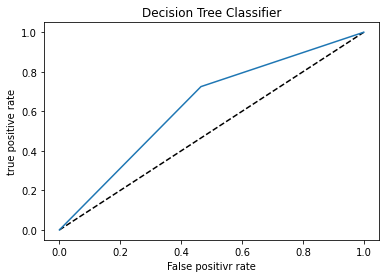

In [107]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,threseholds=roc_curve(y_test,y_pred_prob)
fpr,tpr,threseholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="DecisionTreeClassifier")
plt.xlabel("False positivr rate")
plt.ylabel("true positive rate")
plt.title("Decision Tree Classifier")
plt.show()

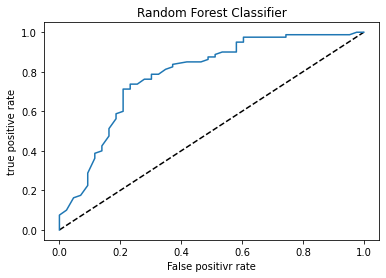

In [108]:
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,threseholds=roc_curve(y_test,y_pred_prob)
fpr,tpr,threseholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel("False positivr rate")
plt.ylabel("true positive rate")
plt.title("Random Forest Classifier")
plt.show()

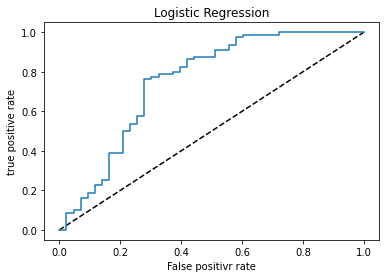

In [109]:
y_pred_prob=lr.predict_proba(x_test)[:,1]
fpr,tpr,threseholds=roc_curve(y_test,y_pred_prob)
fpr,tpr,threseholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False positivr rate")
plt.ylabel("true positive rate")
plt.title("Logistic Regression")
plt.show()

Cross Validation score

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
parameters={"criterion":['gini', 'entropy'],"max_features":["auto","sqrt","log2"]}
clf=GridSearchCV(rfc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'auto'}


In [125]:
rfc=RandomForestClassifier(criterion="gini",max_features="auto")
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))
score=cross_val_score(i,x,y,cv=5)
print("Cross Val Score",score*100)
rfc_=score.mean()
print("Mean",rfc_*100)

0.7479674796747967
[[20 23]
 [ 8 72]]
              precision    recall  f1-score   support

           0       0.71      0.47      0.56        43
           1       0.76      0.90      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123

Cross Val Score [79.67479675 75.6097561  76.42276423 82.92682927 80.32786885]
Mean 78.99240303878449


In [113]:
parameters={"criterion":['gini', 'entropy'],"splitter":["best","random"]}
clf=GridSearchCV(dtc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'splitter': 'best'}


In [123]:
dtc=DecisionTreeClassifier(criterion="gini",splitter="random")
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
score=cross_val_score(i,x,y,cv=5)
print("Cross Val Score",score*100)
dtc_=score.mean()
print("Mean",dtc_*100)

0.6910569105691057
[[26 17]
 [21 59]]
              precision    recall  f1-score   support

           0       0.55      0.60      0.58        43
           1       0.78      0.74      0.76        80

    accuracy                           0.69       123
   macro avg       0.66      0.67      0.67       123
weighted avg       0.70      0.69      0.69       123

Cross Val Score [79.67479675 75.6097561  76.42276423 82.92682927 80.32786885]
Mean 78.99240303878449


In [115]:
parameters={"solver":['newton-cg', 'lbfgs',"liblinear","sag","saga"]}
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'solver': 'newton-cg'}


In [122]:
lr=LogisticRegression(solver="newton-cg",random_state=161)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
score=cross_val_score(i,x,y,cv=5)
print("Cross Val Score",score*100)
lr_=score.mean()
print("Mean",lr_*100)

0.7804878048780488
[[18 25]
 [ 2 78]]
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

Cross Val Score [79.67479675 75.6097561  76.42276423 82.92682927 80.32786885]
Mean 78.99240303878449


In [120]:
import pickle
filename="Loanstatus.pkl"
pickle.dump(lr,open(filename,"wb"))

In [121]:
loaded_model=pickle.load(open('Loanstatus.pkl',"rb"))
result=loaded_model.score(x_test,y_test)
print(result)

0.7804878048780488


In [128]:
import pickle
filename="Loanstatusgnb.pkl"
pickle.dump(gnb,open(filename,"wb"))

In [129]:
loaded_model=pickle.load(open('Loanstatusgnb.pkl',"rb"))
result=loaded_model.score(x_test,y_test)
print(result)

0.7479674796747967
